<a href="https://colab.research.google.com/github/alexandregug/EEIGM/blob/main/S3/S3.Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EEIGM COURSE**
ALEXANDRE GUG


# 1. Introduction to Image processing

# Basic operation with images

## 1. Read and display an image:

All the images can be downloaded from GitHub repository

###Loading the image from a local directory:


Firstly, it should load an image to Google Colab platform:

In [ ]:
from google.colab import files # load skimage libraries
import io
uploaded = files.upload()

Saving acero.png to acero.png


Now, we read the image to get an array with the pixel intensity values ​​in each channel:

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
I = sk.io.imread('acero.png') # read image using imread function

To check the size of the image in pixels and the number of channels:

In [ ]:
I.shape

(1024, 1024, 3)

We can check how many bits are used to encode the intensity levels of each pixel:

In [ ]:
I.dtype

dtype('uint8')

Now we can display the image:

/tmp/ipython-input-1534323884.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I) # visualize image using imshow function
/tmp/ipython-input-1534323884.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


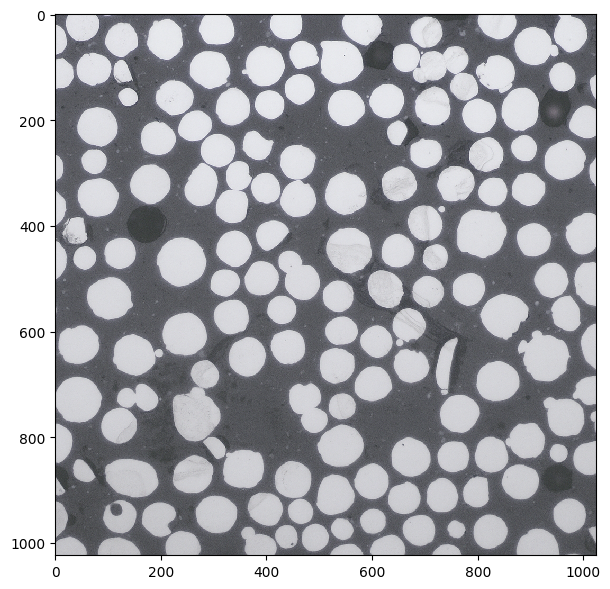

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I) # visualize image using imshow function
sk.io.show()

## 2. Addressing pixel values

In [ ]:
I[0,0] # Pixel value of first row, first column

array([103, 103, 116], dtype=uint8)

In [ ]:
I[0,983] # Pixel value of first row, last column

array([100, 102, 110], dtype=uint8)

Plot the pixels along a specified row:

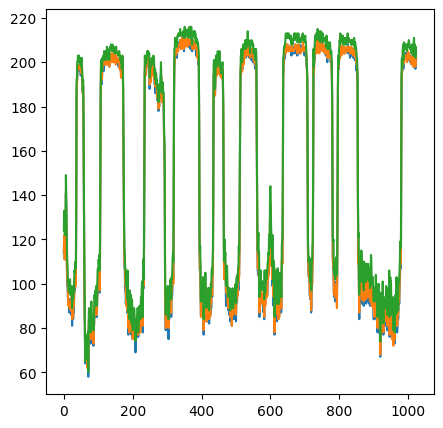

In [ ]:
Irow = I[850,:] # pixels along the row 850

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow)
plt.show()

Check that the formula is correct by accessing a particular pixel:

In [ ]:
I[0,0]

array([103, 103, 116], dtype=uint8)

In [ ]:
(0.2125*I[0,0,0] + 0.7154*I[0,0,1] + 0.0721*I[0,0,2])/255

np.float64(0.4075972549019608)

## Histogram of an image:

The histogram of a grayscale image represents the distribution of pixel intensity values ​​and thus the probability of a certain intensity value (number of pixels with that value / number of total pixels)

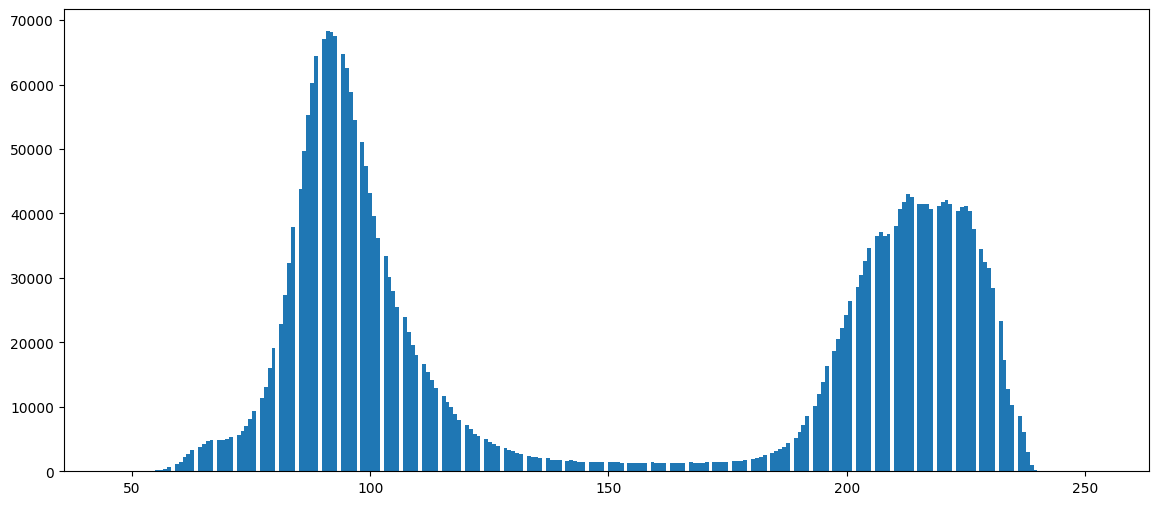

In [ ]:
v = I.reshape(-1)
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=255,density=False)
plt.show()

# 2. Image filtering methods

## Statistical filters

Loading images and adding noise:

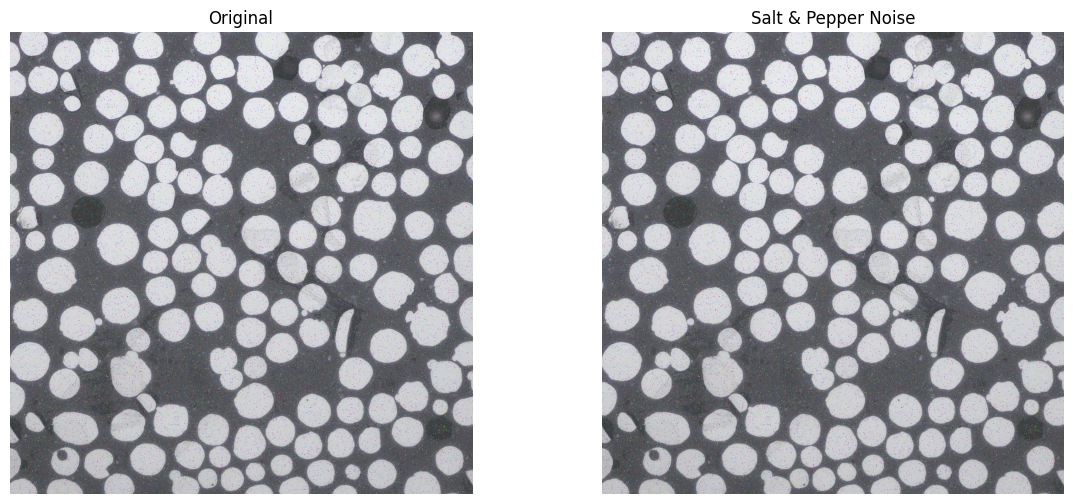

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage import img_as_ubyte

# Charger l'image depuis un fichier (assure-toi que le chemin est correct)
I = io.imread('acero.png')  # Charge l'image à partir du fichier

# Ajouter du bruit salt and pepper (bruit de sel et de poivre)
noise = np.random.random(I.shape)  # Créer des nombres aléatoires entre 0 et 1
noisy_image = img_as_ubyte(I)  # Convertir l'image en uint8

# Appliquer le bruit : changer certains pixels en 0 ou 255
noisy_image[noise > 0.99] = 255  # Ajouter du bruit "sel"
noisy_image[noise < 0.01] = 0    # Ajouter du bruit "poivre"

# Fonction pour afficher l'image originale et l'image avec bruit
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

# Afficher l'image originale et l'image bruitée
plot_comparison(I, noisy_image, 'Salt & Pepper Noise')

# Sauvegarder l'image comparée
plt.savefig('Noisy.png')



In [ ]:
img.shape[0]*img.shape[1]*0.001

262.144

### 3-Median filters

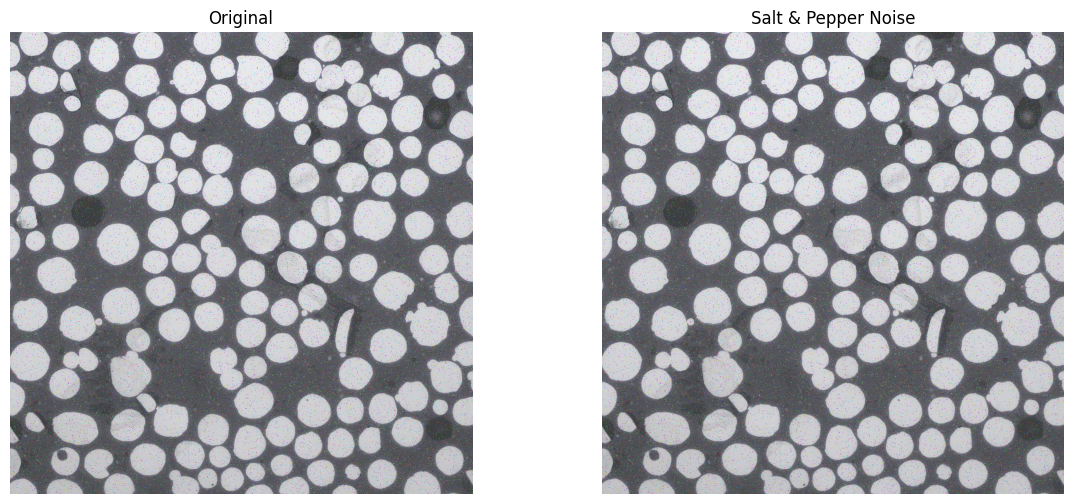

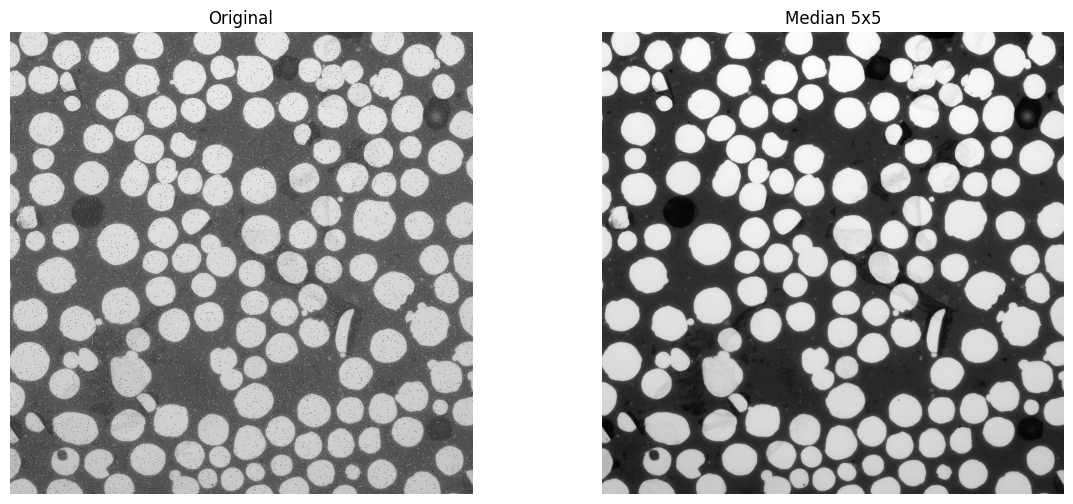

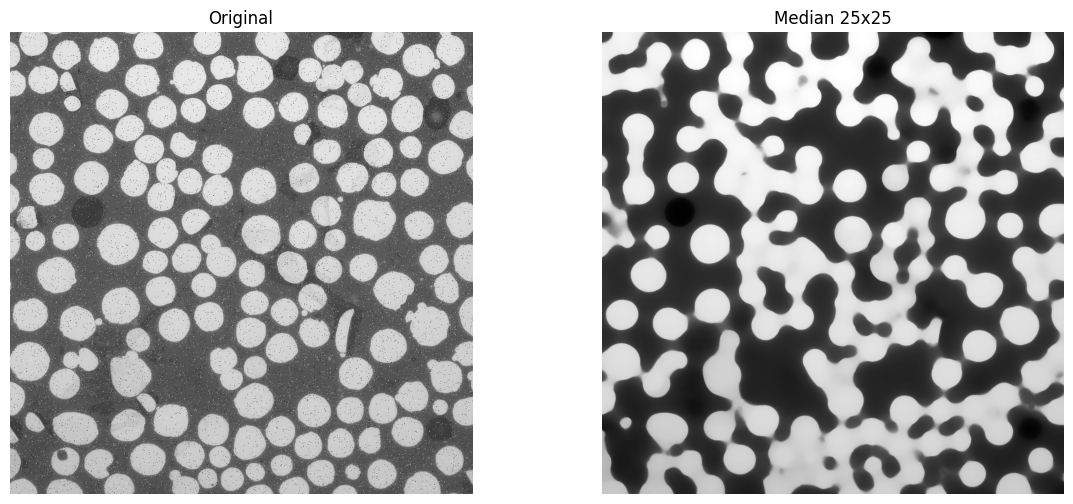

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage import img_as_ubyte
from skimage.morphology import disk
from skimage.filters import median


I = io.imread('acero.png')  # Charge l'image à partir du fichier


if I.ndim == 3 and I.shape[2] == 1:
    I = I.squeeze()


noise = np.random.random(I.shape)
noisy_image = img_as_ubyte(I)


noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')


plot_comparison(I, noisy_image, 'Salt & Pepper Noise')
plt.savefig('Noisy.png')


sel5 = disk(2)


if noisy_image.ndim == 3:
    noisy_image = noisy_image[:, :, 0]

# Appliquer le filtre médian
img_med5x5 = median(noisy_image, sel5)


sel25 = disk(25)
img_med25x25 = median(noisy_image, sel25)


plot_comparison(noisy_image, img_med5x5, 'Median 5x5')
plt.savefig('median_5x5.png')


plot_comparison(noisy_image, img_med25x25, 'Median 25x25')
plt.savefig('median_25x25.png')





### 4-K-MEANS

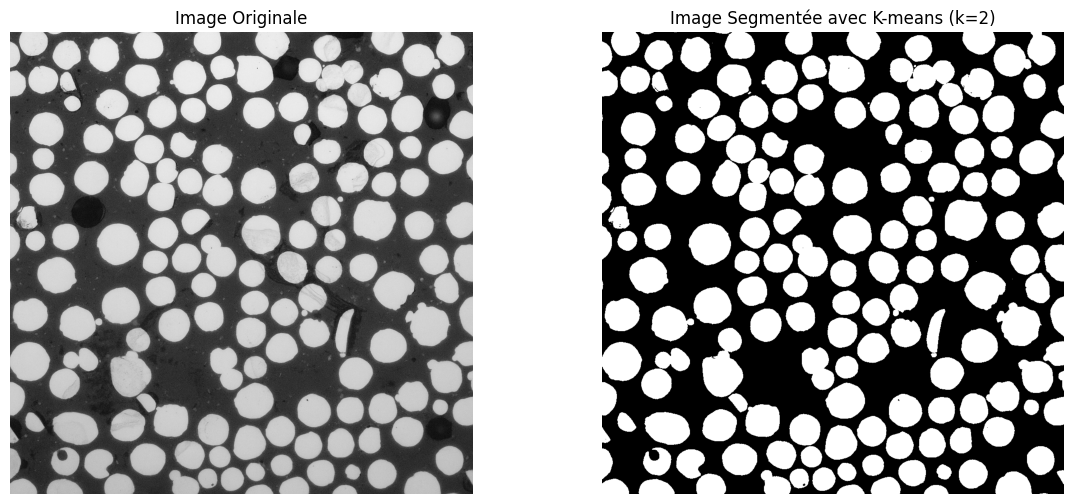

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans


I = io.imread('acero.png')

if I.ndim == 3:
    I = I[:, :, 0]


pixels = I.reshape(-1, 1)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pixels)

labels = kmeans.labels_


segmented_image = labels.reshape(I.shape[0], I.shape[1])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(I, cmap='gray')
axes[0].set_title("Image Originale")
axes[0].axis("off")

axes[1].imshow(segmented_image, cmap='gray')
axes[1].set_title("Image Segmentée avec K-means (k=2)")
axes[1].axis("off")

plt.show()


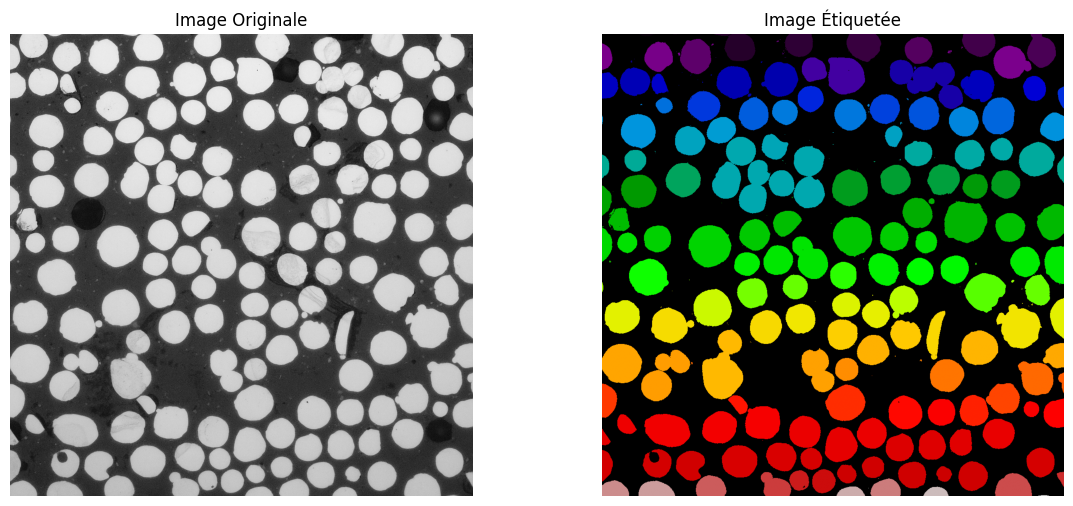

In [ ]:
#5. Etiqueta los objetos encontrados en la imagen. Genera una figura con la imagen original y la imagen etiquetada.

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import label
from skimage import color

I = io.imread('acero.png')

if I.ndim == 3:
    I = I[:, :, 0]


binary_image = I > 127


labeled_image = label(binary_image)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(I, cmap='gray')
axes[0].set_title("Image Originale")
axes[0].axis("off")


axes[1].imshow(labeled_image, cmap='nipy_spectral')
axes[1].set_title("Image Étiquetée")
axes[1].axis("off")

plt.show()


# ### 6-Extrae característica de cada región:

Aire moyenne des régions : 1850.6470588235295
Longueur moyenne du grand axe : 40.535500942842994
Orientation moyenne des régions : -0.13105472029674542


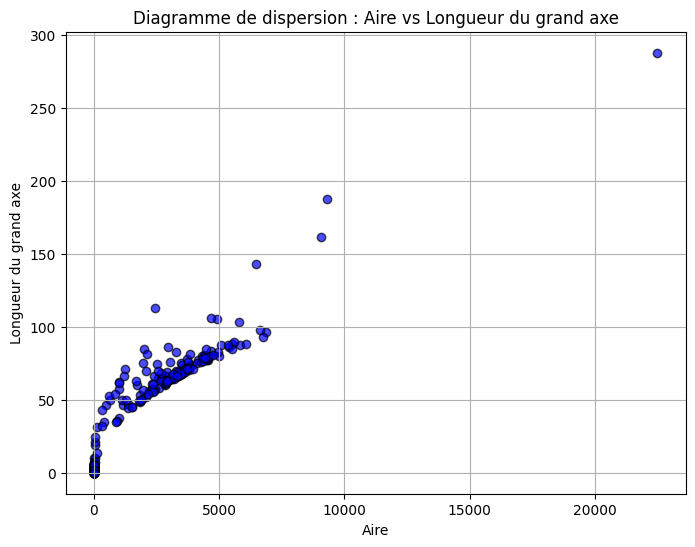

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import label, regionprops
from skimage import filters


I = io.imread('acero.png')

if I.ndim == 3:
    I = I[:, :, 0]


binary_image = I > 127

labeled_image = label(binary_image)

regions = regionprops(labeled_image)


areas = []
major_axes_lengths = []
orientations = []


for region in regions:
    areas.append(region.area)
    major_axes_lengths.append(region.major_axis_length)
    orientations.append(region.orientation)


avg_area = np.mean(areas)
avg_major_axis_length = np.mean(major_axes_lengths)
avg_orientation = np.mean(orientations)

print(f"Aire moyenne des régions : {avg_area}")
print(f"Longueur moyenne du grand axe : {avg_major_axis_length}")
print(f"Orientation moyenne des régions : {avg_orientation}")


plt.figure(figsize=(8, 6))
plt.scatter(areas, major_axes_lengths, c='blue', edgecolors='k', alpha=0.7)
plt.title("Diagramme de dispersion : Aire vs Longueur du grand axe")
plt.xlabel("Aire")
plt.ylabel("Longueur du grand axe")
plt.grid(True)
plt.show()


### 7-Usando las regiones etiquetadas de la imagen, ¿cómo puedes filtrar las regiones para encontrar aquellas con un área mayor de


Nombre de régions avec une aire supérieure à 4000 pixels : 38


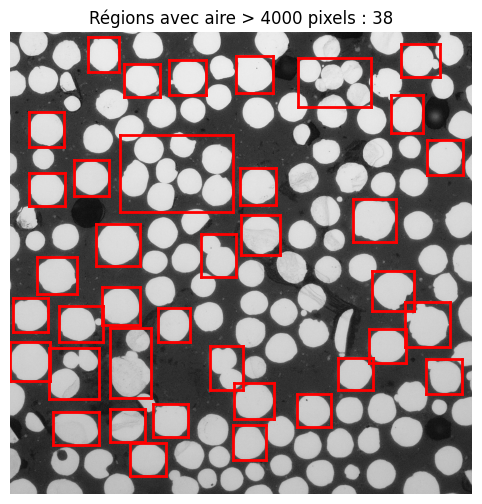

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import label, regionprops

I = io.imread('acero.png')

if I.ndim == 3:
    I = I[:, :, 0]

binary_image = I > 127

labeled_image = label(binary_image)

regions = regionprops(labeled_image)

filtered_regions = [region for region in regions if region.area > 4000]

num_filtered_regions = len(filtered_regions)

print(f"Nombre de régions avec une aire supérieure à 4000 pixels : {num_filtered_regions}")

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(I, cmap='gray')
ax.set_title(f"Régions avec aire > 4000 pixels : {num_filtered_regions}")
ax.axis('off')

for region in filtered_regions:
    minr, minc, maxr, maxc = region.bbox
    ax.plot([minc, maxc], [minr, minr], color='red', lw=2)
    ax.plot([minc, maxc], [maxr, maxr], color='red', lw=2)
    ax.plot([minc, minc], [minr, maxr], color='red', lw=2)
    ax.plot([maxc, maxc], [minr, maxr], color='red', lw=2)

plt.show()


8-Ahora usaremos el algoritmo Otsu utilizando la imagen sin ruído. Muestra los resultados e indica el número de regiones detectadas.

Nombre de régions détectées : 175


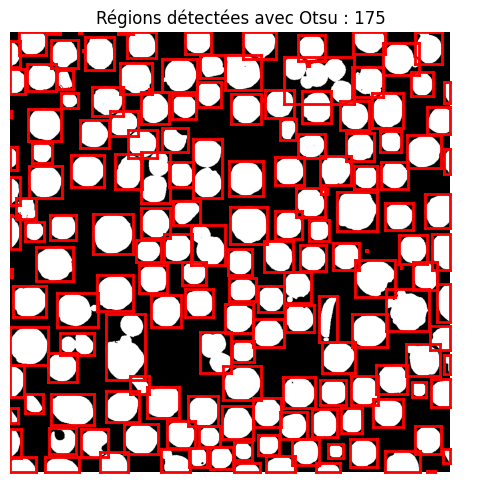

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

I = io.imread('acero.png')

if I.ndim == 3:
    I = I[:, :, 0]

binary_image_otsu = I > threshold_otsu(I)

labeled_image = label(binary_image_otsu)

regions = regionprops(labeled_image)

num_regions = len(regions)

print(f"Nombre de régions détectées : {num_regions}")

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(binary_image_otsu, cmap='gray')
ax.set_title(f"Régions détectées avec Otsu : {num_regions}")
ax.axis('off')

for region in regions:
    minr, minc, maxr, maxc = region.bbox
    ax.plot([minc, maxc], [minr, minr], color='red', lw=2)
    ax.plot([minc, maxc], [maxr, maxr], color='red', lw=2)
    ax.plot([minc, minc], [minr, maxr], color='red', lw=2)
    ax.plot([maxc, maxc], [minr, maxr], color='red', lw=2)

plt.show()


### 9. CONCLUSIÓN FINAL

In [ ]:
# 1. ¿Qué método ha funcionado mejor?

#Filtrado mediano funciona mejor para eliminar ruido sal y pimienta.
#Otsu es mejor cuando la imagen tiene buen contraste y poco ruido.

#2. ¿Has obtenido los mismos resultados?

#No, los resultados varían. El filtrado mediano elimina ruido, mientras que Otsu depende del contraste.
